# Multi Objective Optimization

In [1]:
from wpaf_opt import *

x, moo_res_best, p_best, op_obj = wpaf_multi_opt()

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  0.000000E+00 |  0.6332178017 |             - |             -
     2 |       60 |      1 |  0.000000E+00 |  0.3641832829 |  0.000000E+00 |             f
     3 |       70 |      2 |  0.000000E+00 |  0.2225470891 |  1.0000000000 |         ideal
     4 |       80 |      2 |  0.000000E+00 |  0.1439342036 |  0.8846538705 |         ideal
     5 |       90 |      1 |  0.000000E+00 |  0.0733739401 |  1.6666184698 |         ideal
     6 |      100 |      1 |  0.000000E+00 |  0.0342443040 |  0.000000E+00 |             f
     7 |      110 |      1 |  0.000000E+00 |  0.0122828943 |  0.000000E+00 |             f
     8 |      120 |      1 |  0.000000E+00 |  0.0018635331 |  0.000000E+00 |             f
     9 |      130 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
    10 |      140 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

In [9]:
print("Non Dominant Objective Functions=\n", moo_res_best.F)
print("Non Dominant Design Variables=\n", moo_res_best.X)

Non Dominant Objective Functions=
 [[ 5.2028209  -2.74559932]
 [ 5.2778822  -2.80303025]
 [ 5.17193567 -2.65960774]
 [ 5.25542208 -2.77603534]
 [ 5.19314881 -2.74291611]]
Non Dominant Design Variables=
 [[11.40577119 31.4599915  28.50683875 10.32523083]
 [15.50156953 30.08742816 29.36017289 11.18994409]
 [11.28903429 30.03075751 28.09723827 11.13653925]
 [14.69221852 30.05198202 29.16032042 11.18446797]
 [11.29471681 31.48194021 28.10577439 10.44775218]]


# Pareto Front

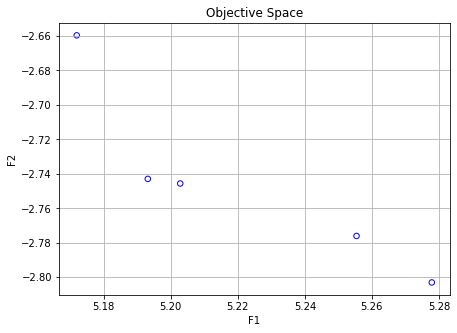

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()
plt.show()

In [4]:
fl = moo_res_best.F.min(axis=0)
fu = moo_res_best.F.max(axis=0)

print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [5.1719356706758814, 5.277882202517774]
Scale f2: [-2.8030302541753125, -2.6596077389397133]


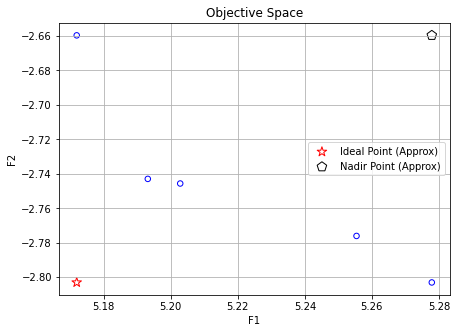

In [34]:
approx_ideal = moo_res_best.F.min(axis=0)
approx_nadir = moo_res_best.F.max(axis=0)

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


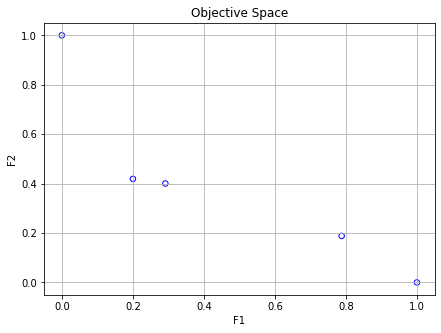

In [35]:
nF = (moo_res_best.F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()
plt.show()

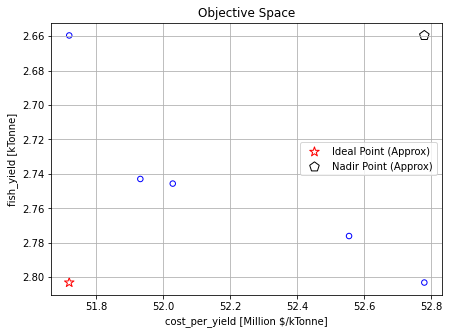

In [32]:
cost_per_yield = 10 * moo_res_best.F[:, 0]
fish_yield = -1 * moo_res_best.F[:, 1]
approx_ideal_tick = [min(cost_per_yield), max(fish_yield)] #min of OBJ
approx_nadir_tick = [max(cost_per_yield), min(fish_yield)] #max of OBJ

plt.figure(figsize=(7, 5))
plt.scatter(cost_per_yield, fish_yield, s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal_tick[0], approx_ideal_tick[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir_tick[0], approx_nadir_tick[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('cost_per_yield [Million $/kTonne]')
plt.ylabel('fish_yield [kTonne]')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()